# EYA NASRI 4ERP-BI2  

# Scoring: Analyse Discriminante avec R

### L’objectif est de discerner les informations importantes pour l’analyse prédictive c.-à-d. obtenir un système simple d’affectation des individus aux classes, avoir des indications sur le rôle (interprétation) et la pertinence (significativité) des variables, et disposer d’un mécanisme de sélection de variables.

In [9]:
dataset=read.csv("alcohol.csv")
dataset

ï..TYPE,MEOH,ACET,BU1,MEPR,ACAL,LNPRO1
KIRSCH,3.0,15.0,0.2,9.0,9.0,5.86
KIRSCH,23.0,13.0,0.8,9.0,2.0,6.67
KIRSCH,65.0,96.0,0.4,9.0,4.0,5.31
KIRSCH,279.0,66.0,0.9,36.0,4.8,5.45
KIRSCH,292.0,210.0,1.1,34.0,8.0,4.08
KIRSCH,371.0,414.0,1.2,39.0,9.0,6.22
KIRSCH,393.0,287.0,1.8,41.0,9.7,6.47
KIRSCH,394.0,217.0,1.0,31.0,8.6,6.31
KIRSCH,418.0,62.0,0.8,24.0,7.0,5.83
KIRSCH,426.0,204.0,1.3,37.0,8.6,6.07


In [10]:
print(summary(dataset))

   ï..TYPE        MEOH             ACET            BU1             MEPR      
 KIRSCH:18   Min.   :   3.0   Min.   : 13.0   Min.   : 0.20   Min.   : 9.00  
 MIRAB :29   1st Qu.: 620.0   1st Qu.:127.0   1st Qu.: 9.30   1st Qu.:26.00  
 POIRE :30   Median : 910.0   Median :181.0   Median :17.00   Median :33.00  
             Mean   : 845.6   Mean   :211.7   Mean   :14.74   Mean   :35.76  
             3rd Qu.:1087.0   3rd Qu.:287.0   3rd Qu.:20.00   3rd Qu.:46.00  
             Max.   :1548.0   Max.   :495.0   Max.   :30.00   Max.   :72.00  
      ACAL           LNPRO1     
 Min.   : 2.00   Min.   :3.300  
 1st Qu.: 8.60   1st Qu.:4.280  
 Median :11.00   Median :5.260  
 Mean   :12.51   Mean   :5.301  
 3rd Qu.:15.00   3rd Qu.:6.220  
 Max.   :28.00   Max.   :8.010  


In [11]:
#linear discriminant analysis
library(MASS)

Warning message:
"package 'MASS' was built under R version 3.6.3"

In [17]:
set.seed(555)
ind <- sample(2, nrow(dataset),
              replace = TRUE,
              prob = c(0.6, 0.4))
training <- dataset[ind==1,]
testing <- dataset[ind==2,]

In [20]:
# Linear discriminant analysis
library(MASS)
linear <- lda(ï..TYPE~., training)
linear
attributes(linear)

Call:
lda(ï..TYPE ~ ., data = training)

Prior probabilities of groups:
   KIRSCH     MIRAB     POIRE 
0.1960784 0.3921569 0.4117647 

Group means:
           MEOH   ACET      BU1     MEPR    ACAL LNPRO1
KIRSCH 412.2500 208.33  1.44000 33.32000 10.5700  6.290
MIRAB  936.6000 254.10 17.96500 32.00000 13.0550  4.844
POIRE  986.2381 171.00 18.69524 42.85714 11.9619  5.150

Coefficients of linear discriminants:
                 LD1          LD2
MEOH    0.0035129165  0.001193136
ACET   -0.0001014156 -0.007338443
BU1     0.1123730635 -0.008095938
MEPR   -0.0246169615  0.040460726
ACAL   -0.0207123150 -0.026809687
LNPRO1 -0.4295609516  0.444604410

Proportion of trace:
   LD1    LD2 
0.8977 0.1023 

$names
 [1] "prior"   "counts"  "means"   "scaling" "lev"     "svd"     "N"      
 [8] "call"    "terms"   "xlevels"

$class
[1] "lda"

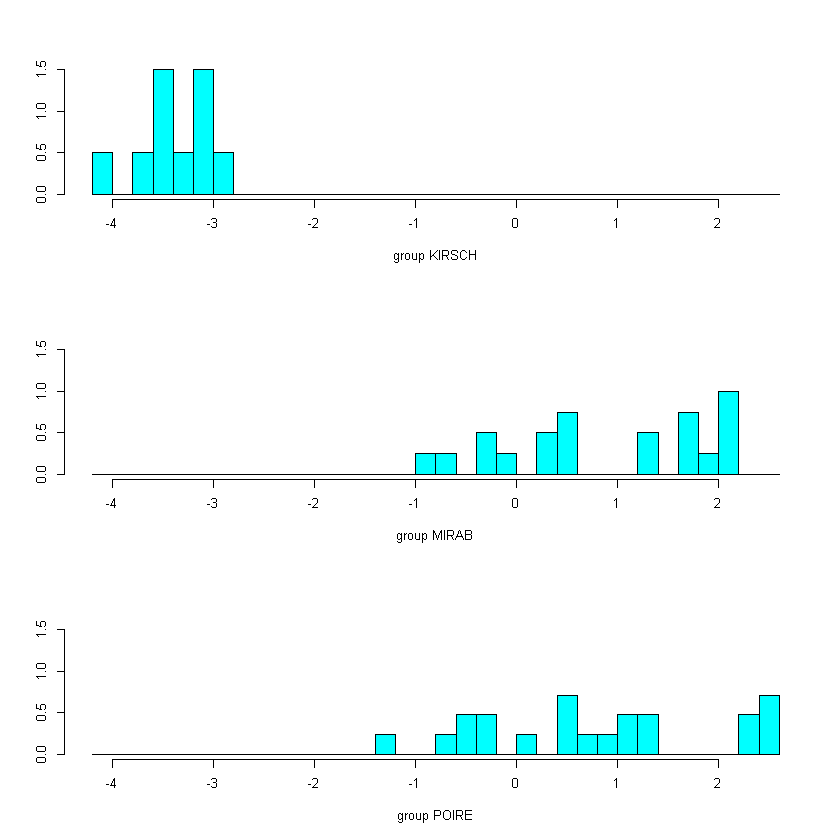

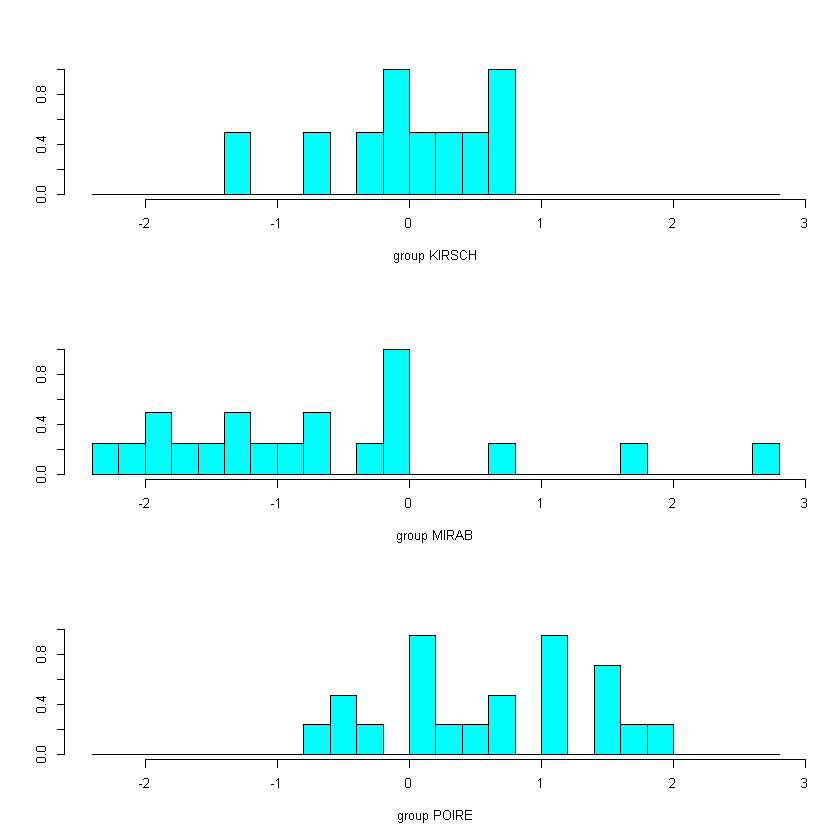

In [32]:
# Histogram
p <- predict(linear, training)
ldahist(data = p$x[,1], g = training$ï..TYPE)
ldahist(data = p$x[,2], g = training$ï..TYPE)

In [29]:
install.packages("klaR")

also installing the dependencies 'glue', 'R.methodsS3', 'R.oo', 'R.utils', 'cli', 'R.cache', 'miniUI', 'styler', 'classInt', 'labelled', 'combinat', 'questionr'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
glue       1.4.2  1.6.2              TRUE
R.utils   2.10.1 2.11.0             FALSE
cli        2.5.0  3.3.0              TRUE
styler     1.4.1  1.7.0             FALSE
labelled   2.8.0  2.9.1             FALSE
questionr  0.7.3  0.7.7             FALSE
klaR      0.6-15  1.7-0             FALSE

  Binaries will be installed
package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\eyanasri\anaconda3\envs\env\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\eyanasri\anaconda3\envs\env\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'R.methodsS3' successfully unpacked and MD5 sums checked
package 'R.oo' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'R.cache' successfully unpacked and MD5 sums checked
package 'miniUI' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 'combinat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eyanasri\AppData\Local\Temp\Rtmp8Ob1mJ\downloaded_packages


installing the source packages 'R.utils', 'styler', 'labelled', 'questionr', 'klaR'



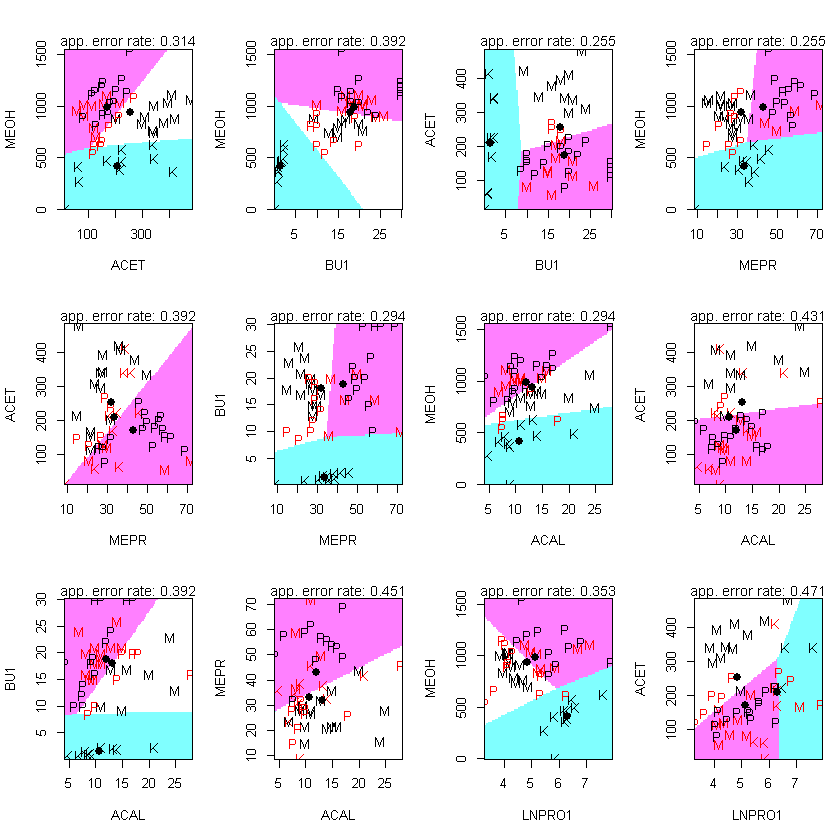

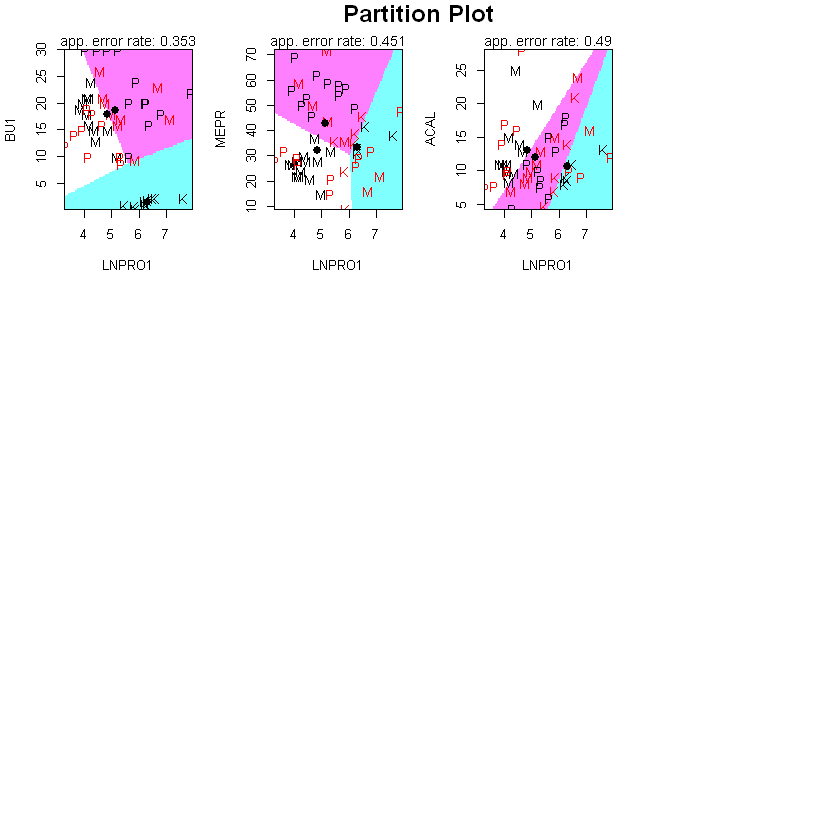

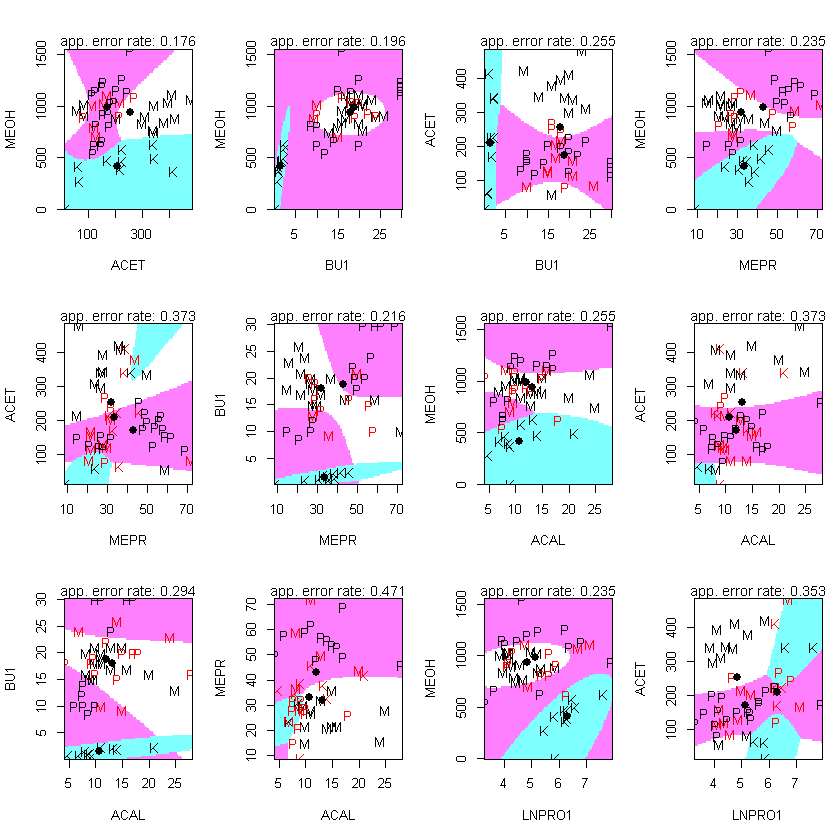

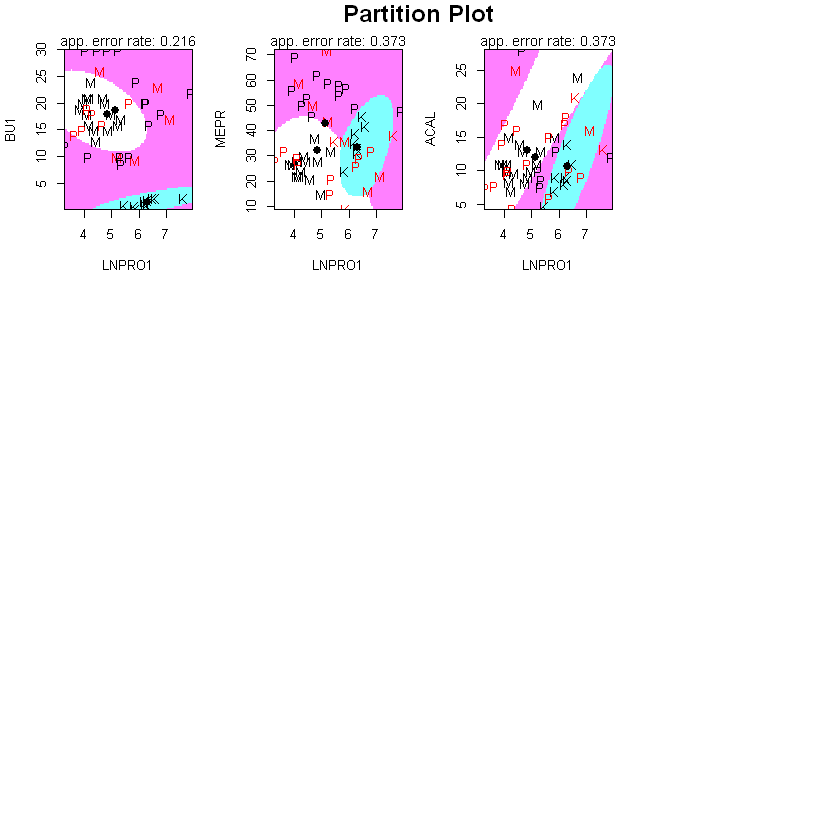

In [31]:
# Partition plot
library(klaR)
partimat(ï..TYPE~., data = training, method = "lda")
partimat(ï..TYPE~., data = training, method = "qda")

In [33]:
# Confusion matrix and accuracy - training data
p1 <- predict(linear, training)$class
tab <- table(Predicted = p1, Actual = training$ï..TYPE)
tab
sum(diag(tab))/sum(tab)

         Actual
Predicted KIRSCH MIRAB POIRE
   KIRSCH     10     0     0
   MIRAB       0    15     4
   POIRE       0     5    17

[1] 0.8235294

In [34]:
# Confusion matrix and accuracy - testing data
p2 <- predict(linear, testing)$class
tab1 <- table(Predicted = p2, Actual = testing$ï..TYPE)
tab1
sum(diag(tab1))/sum(tab1)

         Actual
Predicted KIRSCH MIRAB POIRE
   KIRSCH      8     0     0
   MIRAB       0     4     3
   POIRE       0     5     6

[1] 0.6923077